In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def get_cricket_stats(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    bowling_table = soup.find('table', class_='ds-table')
    rows = bowling_table.find_all('tr')
    bowling_stats = {'Span': [], 'Mat': [], 'Inns': [], 'NO': [], 'Runs': [], 'HS': [], 'Avg': [], 'BF': [], 'SR': [],
                     '100s': [], '50s': [], '0s': [], '4s': [], '6s': []}
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) >= 13:
            bowling_stats['Span'].append(cols[1].text.strip())
            bowling_stats['Mat'].append(cols[2].text.strip())
            bowling_stats['Inns'].append(cols[3].text.strip())
            bowling_stats['NO'].append(cols[4].text.strip())
            bowling_stats['Runs'].append(cols[5].text.strip())
            bowling_stats['HS'].append(cols[6].text.strip())
            bowling_stats['Avg'].append(cols[7].text.strip())
            bowling_stats['BF'].append(cols[8].text.strip())
            bowling_stats['SR'].append(cols[9].text.strip())
            bowling_stats['100s'].append(cols[10].text.strip())
            bowling_stats['50s'].append(cols[11].text.strip())
            bowling_stats['0s'].append(cols[12].text.strip())
            bowling_stats['4s'].append(cols[13].text.strip())
            bowling_stats['6s'].append(cols[14].text.strip())
        else:
            pass

    return bowling_stats

In [3]:
links = [
    'https://www.espncricinfo.com/cricketers/virat-kohli-253802/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/ms-dhoni-28081/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/ab-de-villiers-44936/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/shubman-gill-1070173/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/adam-gilchrist-5390/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/chris-gayle-51880/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/brian-lara-52337/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/rohit-sharma-34102/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/ajinkya-rahane-277916/bowling-batting-stats',
    'https://www.espncricinfo.com/cricketers/babar-azam-348144/bowling-batting-stats'
]

names = [
    "Virat Kohli",
    "MS Dhoni",
    "AB De Villiers",
    "Shubman Gill",
    "Adam Gilchrist",
    "Chris Gayle",
    "Brian Lara",
    "Rohit Sharma",
    "Ajinkya Rahane",
    "Babar Azam"
]

players_dicts = {name: get_cricket_stats(link) for name, link in zip(names, links)}

players_dfs = {name: pd.DataFrame(data) for name, data in players_dicts.items()}

for name, df in players_dfs.items():
    print(name)
    display(df.head())

players_years = {name: df['Span'].iloc[0].split('-') for name, df in players_dfs.items()}

players_years = {name: (int(start_year), int(end_year)) for name, (start_year, end_year) in players_years.items()}

players_total_runs = {name: int(df['Runs'].iloc[0].replace('*', '')) for name, df in players_dfs.items()}

Virat Kohli


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2011-2024,113,191,11,8848,254*,49.15,15924,55.56,29,30,14,991,26


MS Dhoni


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2005-2014,90,144,16,4876,224,38.09,8249,59.11,6,33,10,544,78


AB De Villiers


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2004-2018,114,191,18,8765,278*,50.66,16077,54.51,22,46,8,1024,64


Shubman Gill


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2020-2024,24,43,3,1292,128,32.30,2174,59.42,3,5,4,152,17


Adam Gilchrist


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,1999-2008,96,137,20,5570,204*,47.60,6796,81.95,17,26,14,677,100


Chris Gayle


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2000-2014,103,182,11,7214,333,42.18,11970,60.26,15,37,15,1046,98


Brian Lara


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,1990-2006,131,232,6,11953,400*,52.88,19753,60.51,34,48,17,1559,88


Rohit Sharma


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2013-2024,58,98,10,3977,212,45.19,6999,56.82,11,16,5,434,80


Ajinkya Rahane


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2013-2023,85,144,12,5077,188,38.46,10256,49.50,12,26,10,578,35


Babar Azam


,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,2016-2024,52,94,9,3898,196,45.85,7105,54.86,9,26,7,453,23


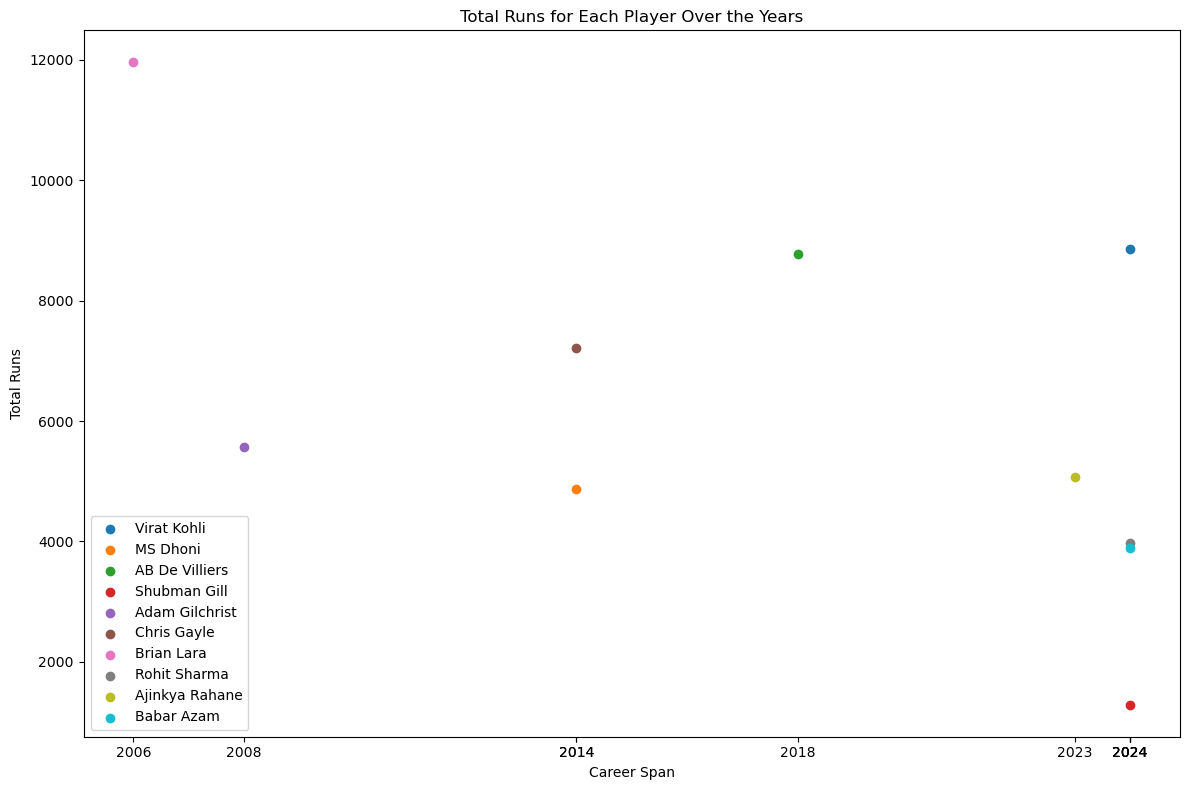

In [4]:

plt.figure(figsize=(12, 8))
for name, (start_year, end_year) in players_years.items():
    total_runs = players_total_runs[name]
    plt.scatter(end_year, total_runs, marker='o', label=name)

plt.xlabel('Career Span')
plt.ylabel('Total Runs')
plt.title('Total Runs for Each Player Over the Years')
plt.xticks([end_year for _, end_year in players_years.values()])
plt.legend()
plt.tight_layout()
plt.show()